# Exercises 08

### Mortgage questions

**Question 1 (3 points)** This is a math question. Assuming a fixed rate mortage of rate $r$, after how many months have you paid half of the original loan amount?

If $r$ is monthly rate of interest and $N$ is the total loan period in months,then the amount of principal remaining after $k$ months is 
$$ P_k = P_0(1+r)^k - M(\frac{(1+r)^k-1}{r})$$
The monthly repayment rate for the loan with monthly interest $r$ is
$$ M = \frac{P_0(1+r)^Nr}{(1+r)^N - 1}$$
Plug the value of M in the first Formula
$$ P_k = P_0(1+r)^k - (\frac{P_0(1+r)^Nr}{(1+r)^N - 1})(\frac{(1+r)^k-1}{r})$$
we get
$$\frac{P_k}{P_0} = 1 - (\frac{(1+r)^k-1}{(1+r)^N-1})$$
$$put  LHS =\frac{1}{2}$$ i.e. $$\frac{P_k}{P_0} = \frac{1}{2}$$
we get,
$$\frac{1}{2} = 1 - (\frac{(1+r)^k-1}{(1+r)^N-1})$$
$$\frac{1}{2} = (\frac{(1+r)^k-1}{(1+r)^N-1})$$
$$2(1+r)^k - 2 = (1+r)^N - 1$$
$$2(1+r)^k = (1+r)^N+1$$
Taking log on both side,
$$2log(1+r)^k=log((1+r)^N +1)$$
$$2klog(1+r)=log((1+r)^N +1)$$
$$k = \frac{log((1+r)^N +1)}{2log(1+r)}$$

**Question 2 (4 points)** Produce a plot that shows how much is owed on a $250,000 loan with

1) a fixed 5% loan for 30 years, and 

2) a two rate mortgage that has a 3.5% rate for 5 years and then 7% for the remaining 25 years

Your figure should look like the following, with the x-axis label saying "Number of Months" the y-axis label saying "Balance Remaining" and the legend describing the two curves.

![Mortgage Comparison](Mortgage_Comparison.png)

In [56]:
def findPayment(loan,r,m):
    return loan*(r*(1+r)**m)/((1+r)**m -1)

class Mortgage(object):

    def __init__(self, loan, annRate, months):
        self.loan = loan
        self.rate = annRate/12.0
        self.months = months
        self.paid = [0.0]
        self.owed = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None 

    def makePayment(self):
        self.paid.append(self.payment)
        reduction = self.payment - self.owed[-1]*self.rate
        self.owed.append(self.owed[-1] - reduction)

    def getTotalPaid(self):
        return sum(self.paid)

    def __str__(self):
        return self.legend

    def plotBalance(self, style):
        mp.plot(self.owed, style, label = self.legend)
        mp.legend(loc = 'upper right')

In [57]:
class Fixed(Mortgage):
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months)
        self.legend = 'Fixed Rate'

class FixedWithPts(Mortgage):

    def __init__(self, loan, r, months, pts):
        Mortgage.__init__(self, loan, r, months)
        self.pts = pts
        self.paid = [loan*(pts/100.0)]
        self.legend = 'Fixed Rate'
class TwoRate(Mortgage):
    def __init__(self, loan, r, months, teaserRate, teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r/12.0
        self.legend = 'Two Rate'

    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.owed[-1], self.rate, self.months - self.teaserMonths)

        Mortgage.makePayment(self)

In [58]:
import matplotlib.pyplot as mp
def plotMortgage(morts,amt):
    styles = ['b-','r-']
    fig = mp.figure()
    mp.title('Two Different Mortgages with Initial Loan 250000')
    mp.xlabel('Number of months')
    mp.ylabel('Balance Remaining')
    for i in range(len(morts)):
        morts[i].plotBalance(styles[i])

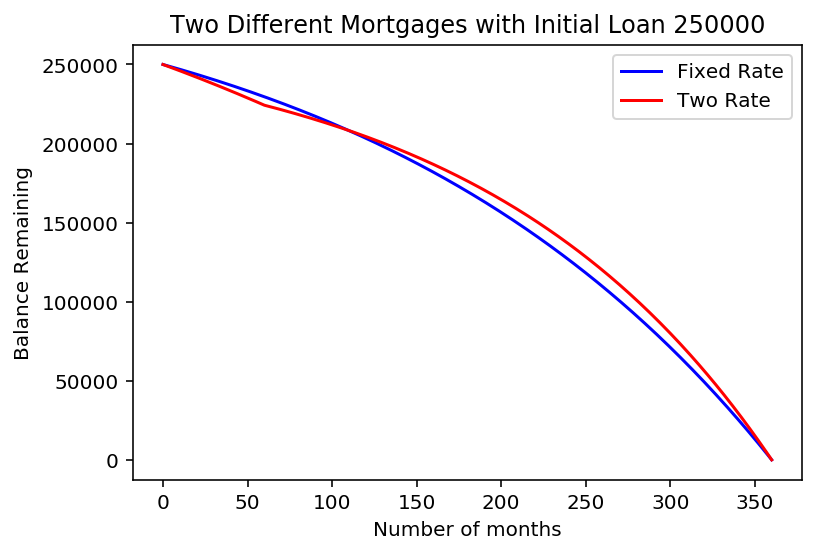

In [60]:
M1 = Fixed(250000,0.05,360)
M2 = TwoRate(250000,0.07,360,0.035,60)
morts = [M1,M2]
for i in range(360):
    for m in morts:
        m.makePayment()
plotMortgage(morts,250000)